<a href="https://colab.research.google.com/github/diego2017003/ula/blob/master/ProjetoFinal_PDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from scipy.signal import welch
import scipy
from scipy.fft import fft, ifft

In [9]:
#Carrega o arquivo
samplerate, data = wavfile.read('568838__josefpres__dark-loops-201-piano-with-melody-short-loop-60-bpm.wav')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


In [10]:
#Amostras / segundo 
print("Amostras por segundo: ", samplerate)

Amostras por segundo:  44100


In [11]:
#Carrega o arquivo em dois canais (audio estereo)
print(f"numero de canais = {data.shape[1]}")

numero de canais = 2


# (a) Plotando o sinal no domínio do tempo

In [12]:
#Tempo total = numero de amostras / fs
length = data.shape[0] / samplerate
print(f"duracao = {length}s")

duracao = 64.0s


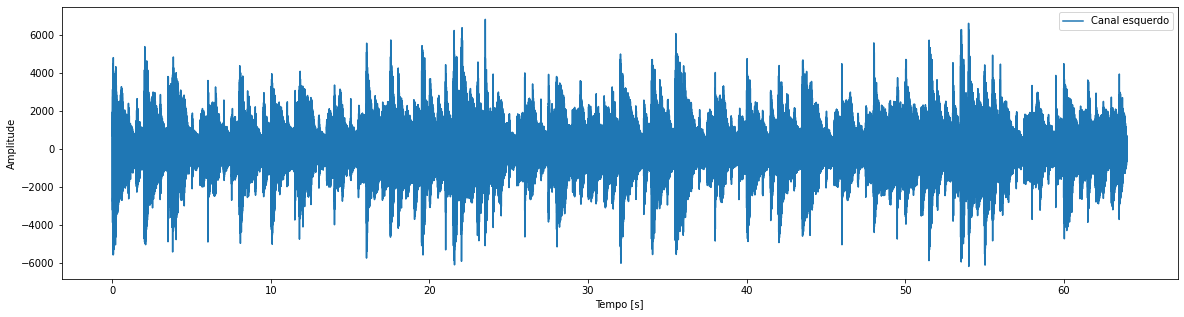

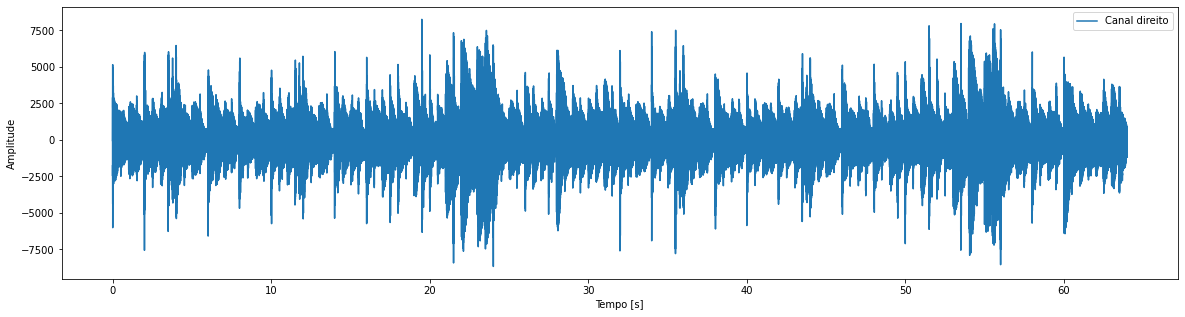

In [13]:
#Criando eixo do tempo
time = np.linspace(0., length, data.shape[0])

#Plotando canal esquerdo
plt.figure(1, figsize=(20, 5))
plt.plot(time, data[:, 0], label="Canal esquerdo")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

#Plotando canal direito
plt.figure(2, figsize=(20, 5))
plt.plot(time, data[:, 1], label="Canal direito")
plt.legend()
plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.show()

# (b) Plotando o espectro de frequências do sinal usando FFT

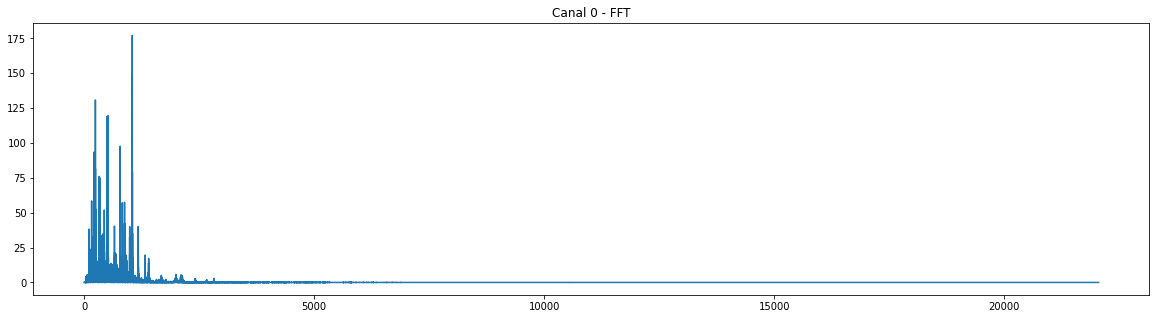

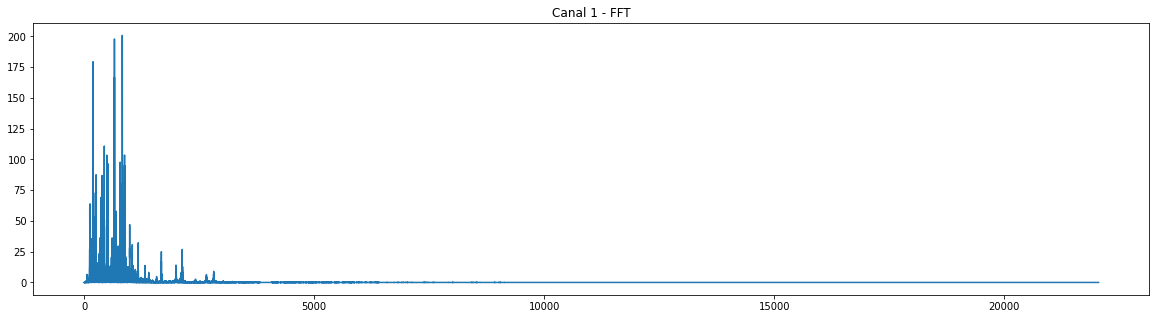

In [14]:
#Sabendo que T = 1 / fs
#Temos que: T = 2.26 * 10e-5 s aproximadamente
#Também podemos obter T como a diferença entre time[0] e time[1] -> Sample Spacing

N = data.shape[0] #Numero de Amostras
T = time[1]-time[0] #Sample Spacing
y = data[:,0] #Sinal no canal 0
yf = fft(y) #Sinal transformado no domínio da frequência
xf = np.linspace(0.0, 1.0//(2.0*T), N//2) #Eixo da frequência. Os limites da frequência vão de 0 até int(1 / 2T)

plt.figure(1,figsize=(20, 5))
plt.title("Canal 0 - FFT")
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))

y2 = data[:,1] #Sinal no canal 1
yf = fft(y2) #Sinal transformado no domínio da frequência
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

plt.figure(2,figsize=(20, 5))
plt.title("Canal 1 - FFT")
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

#Antes de C -  análise do espectro de frequência 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  import sys


0.8500000020598021
1257.3969886599975


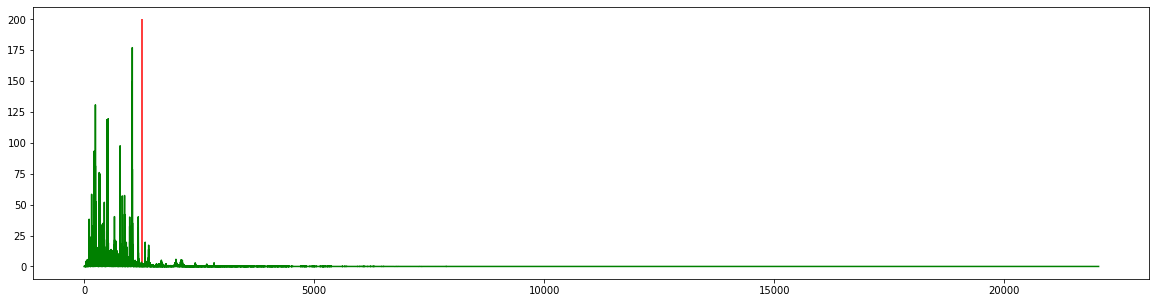

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.


0.8500048092099183
1372.2668603081493
22049.0


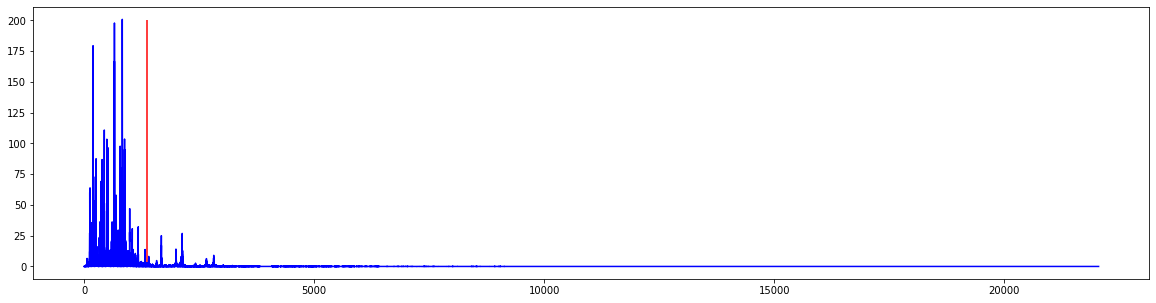

In [24]:
#numero de amostras
N =2822400
# sample spacing
T = time[1]-time[0]#tempo entre amostras
x = np.linspace(0.0, N*T, N)#eixo do tempo
y = data[:,0] #ampllitude do sinal Dominio do tempo(Canal 1)
yf = scipy.fft(y) #sinal no dominio da frequência
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)#eixo da frequência

plt.figure(1,figsize=(20, 5))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]),color='green')
#"centro de massa" da função no domínio da frequência 
peso = 0.0 #porcentagem do sinal acumulado
rangeData = len(yf)//2 #frequências positivas da FFT do canal 1 
sc1 = sum(abs(yf[:rangeData])) #todo o sinal acumulado 
count = 0 # quantidade de amostras somadas
#Sinal acumulado no domínio do tempo até 85%
'''Foi observado que ao acumular 85% do sinal era alcançada uma frequência representativa para
estipular o que era sinal e o que era ruído para isso é suposto um ruído awgn que representando
15% do sinal'''
for i in abs(yf[:rangeData]):
  peso = peso + i/sc1
  count = count + 1
  if(peso >= 0.85):
    print(peso)
    break
print(xf[count])#frequência de corte para o primeiro canal
plt.vlines(x = xf[count],ymin = 0 ,ymax = 200,color = 'red')
plt.show()


y2 = data[:,1]#ampllitude do sinal Dominio do tempo(Canal 1)
yf = scipy.fft(y2)#transformada rápida de fourier de y2
xf = np.linspace(0.0, 1.0//(2.0*T), N//2) #eixo da frequência

plt.figure(2,figsize=(20, 5))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]),color='blue')


peso2 = 0.0
rangeData2 = len(yf)//2
sc2 = sum(abs(yf[:rangeData2]))
frequency = 0 
count = 0

for i in abs(yf[:rangeData2]):
  peso2 = peso2 + i/sc2
  count = count + 1
  if(peso2 >= 0.85):
    print(peso2)
    break

print(xf[count])#frequênciade corte para canal 2
print(xf[-1])
plt.vlines(x = xf[count],ymin = 0 ,ymax = 200,color = 'red')
plt.show()

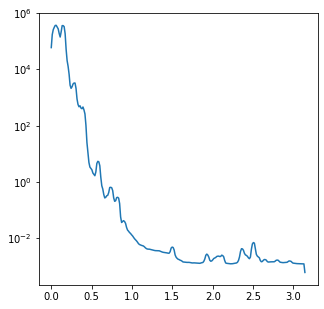

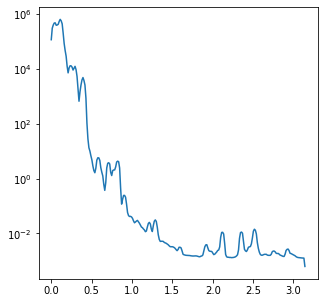

In [23]:
xw1 = data[:,0]
fs = 2*np.pi
fespct1 , PSpect1 = welch(xw1,fs,'flattop',512,scaling='spectrum')

plt.figure(1,figsize=(5,5))
plt.semilogy(fespct1,PSpect1)

xw2 = data[:,1]
fs2 = 2*np.pi
fespct2 , PSpect2 = welch(xw2,fs2,'flattop',512,scaling='spectrum')

plt.figure(2,figsize=(5,5))
plt.semilogy(fespct2,PSpect2)

plt.show()

# (c) Projeto de filtro FIR que corte metade do conteúdo espectral

In [29]:
aux = (2.0/N * np.abs(yf[:N//2])).cumsum() 
meio = aux[-1] / 2
valorMeio = aux[aux >= meio][0]
freqMetade = xf[aux >= valorMeio][0]
print("Frequência de metade do conteúdo espectral: ", freqMetade, " Hz")

Frequência de metade do conteúdo espectral:  682.3757854136801  Hz


In [74]:
#convolução do filtro
import pandas as pd

filtro = pd.read_csv("filter1380_1500.csv")
filtroFir = np.array([])
for i in filtro.va:
  print(i)
  np.append(filtroFir,i)
y = data[:,0]
print(y.ndim)
print(filtroFir)
#yf = scipy.signal.convolve(y,filtroFir)


AttributeError: ignored